In [1]:
# Imports and configurations

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
# Load data
df = pd.read_csv('https://raw.githubusercontent.com/jackal0206/public_files/main/train_adjusted.csv')

# data description: https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques/data

In [3]:
target_columns = np.concatenate(([df.columns[13], df.columns[20]], df.columns[-25:]))

df_target = df[target_columns]

df_target.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 27 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   LandSlope      1460 non-null   object 
 1   OverallCond    1460 non-null   int64  
 2   FireplaceQu    770 non-null    object 
 3   GarageType     1379 non-null   object 
 4   GarageYrBlt    1379 non-null   float64
 5   GarageFinish   1379 non-null   object 
 6   GarageCars     1460 non-null   int64  
 7   GarageArea     1460 non-null   int64  
 8   GarageQual     1379 non-null   object 
 9   GarageCond     1379 non-null   object 
 10  PavedDrive     1460 non-null   object 
 11  WoodDeckSF     1460 non-null   int64  
 12  OpenPorchSF    1460 non-null   int64  
 13  EnclosedPorch  1460 non-null   int64  
 14  3SsnPorch      1460 non-null   int64  
 15  ScreenPorch    1460 non-null   int64  
 16  PoolArea       1460 non-null   int64  
 17  PoolQC         7 non-null      object 
 18  Fence   

In [4]:
# let's look at garage first
df_target.iloc[:,:9]

,LandSlope,OverallCond,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual
0,Gtl,5,NaN,Attchd,2003.0,RFn,2,548,TA
1,Gtl,8,TA,Attchd,1976.0,RFn,2,460,TA
2,Gtl,5,TA,Attchd,2001.0,RFn,2,608,TA
3,Gtl,5,Gd,Detchd,1998.0,Unf,3,642,TA
4,Gtl,5,TA,Attchd,2000.0,RFn,3,836,TA
...,...,...,...,...,...,...,...,...,...
1455,Gtl,5,TA,Attchd,1999.0,RFn,2,460,TA
1456,Gtl,6,TA,Attchd,1978.0,Unf,2,500,TA
1457,Gtl,9,Gd,Attchd,1941.0,RFn,1,252,TA
1458,Gtl,6,NaN,Attchd,1950.0,Unf,1,240,TA


<Axes: xlabel='GarageType', ylabel='AdjSalePrice'>

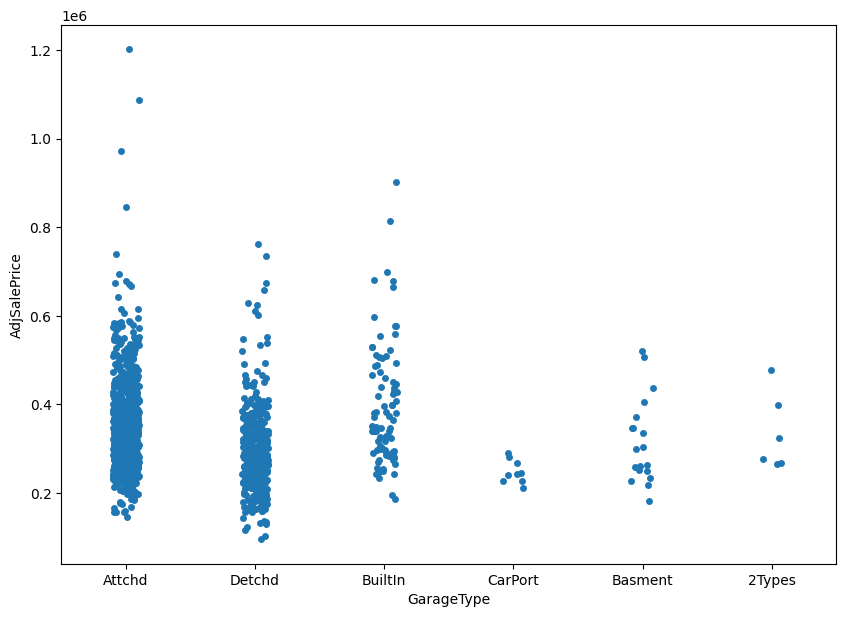

In [5]:
plt.rc('figure', figsize=(10, 7))
sns.stripplot(data = df_target[df_target.notnull()['GarageType']], x = "GarageType", y = "AdjSalePrice", dodge=True)

#sns.boxplot(data = df_target[df_target.notnull()['GarageType']], x = "GarageType", y = "AdjSalePrice")


<Axes: xlabel='GarageFinish', ylabel='AdjSalePrice'>

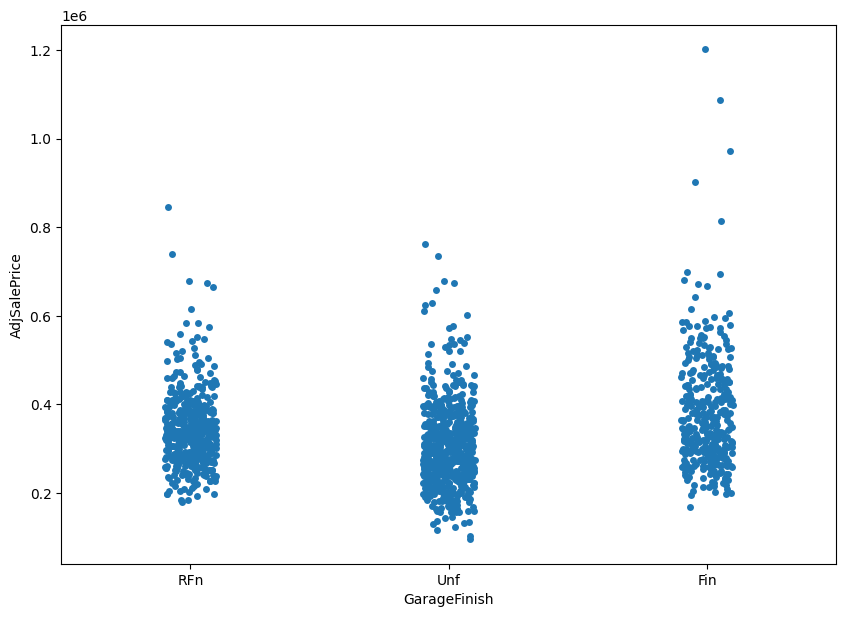

In [6]:
plt.rc('figure', figsize=(10, 7))
sns.stripplot(data = df_target[df_target.notnull()['GarageFinish']], x = "GarageFinish", y = "AdjSalePrice", dodge=True)

<Axes: xlabel='GarageQual', ylabel='AdjSalePrice'>

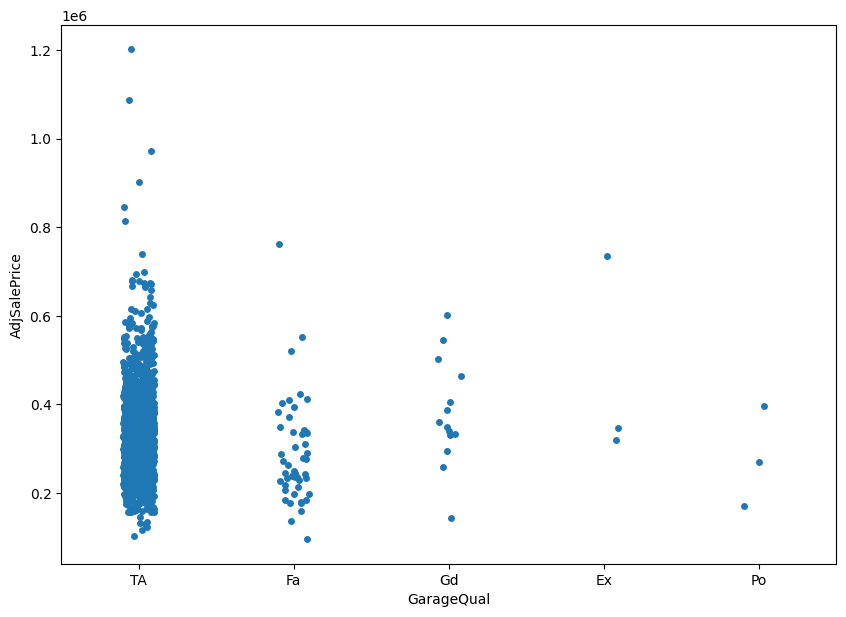

In [7]:
plt.rc('figure', figsize=(10, 7))
sns.stripplot(data = df_target[df_target.notnull()['GarageQual']], x = "GarageQual", y = "AdjSalePrice", dodge=True)

<Axes: xlabel='GarageCond', ylabel='AdjSalePrice'>

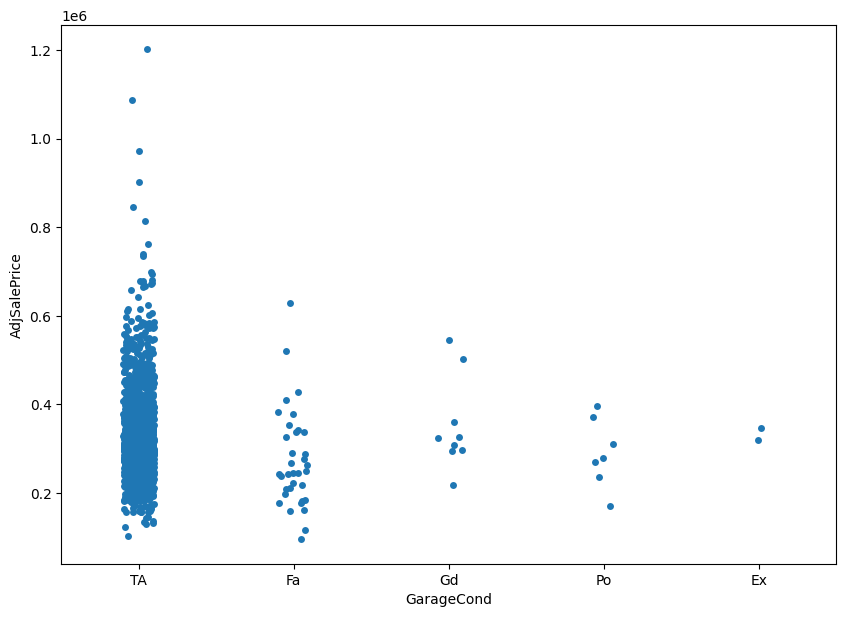

In [8]:
plt.rc('figure', figsize=(10, 7))
sns.stripplot(data = df_target[df_target.notnull()['GarageCond']], x = "GarageCond", y = "AdjSalePrice", dodge=True)

In [9]:
df[['GarageYrBlt', 'GarageCars', 'GarageArea', 'AdjSalePrice']].corr()

,GarageYrBlt,GarageCars,GarageArea,AdjSalePrice
GarageYrBlt,1.000000,0.588920,0.564567,0.154527
GarageCars,0.588920,1.000000,0.882475,0.473495
GarageArea,0.564567,0.882475,1.000000,0.467388
AdjSalePrice,0.154527,0.473495,0.467388,1.000000


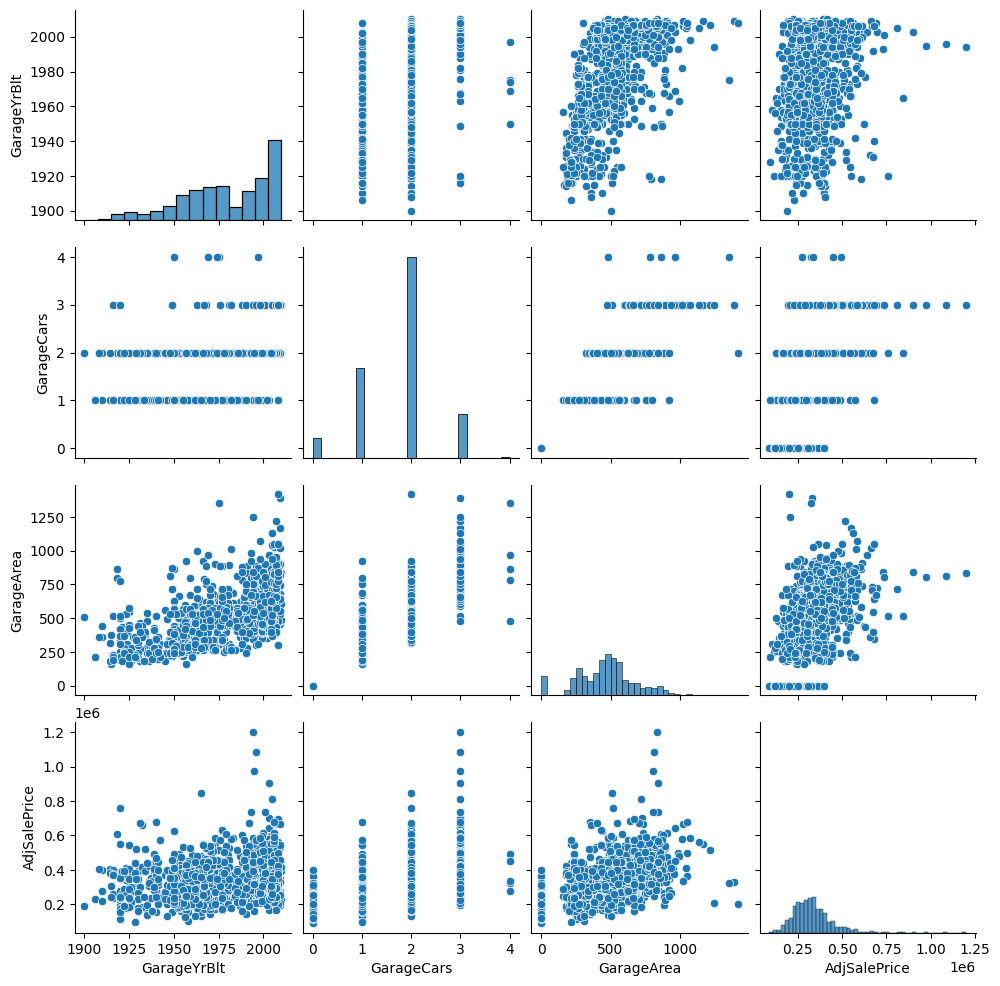

In [10]:
sns.pairplot(df[['GarageYrBlt', 'GarageCars', 'GarageArea', 'AdjSalePrice']])

<Axes: xlabel='PavedDrive', ylabel='AdjSalePrice'>

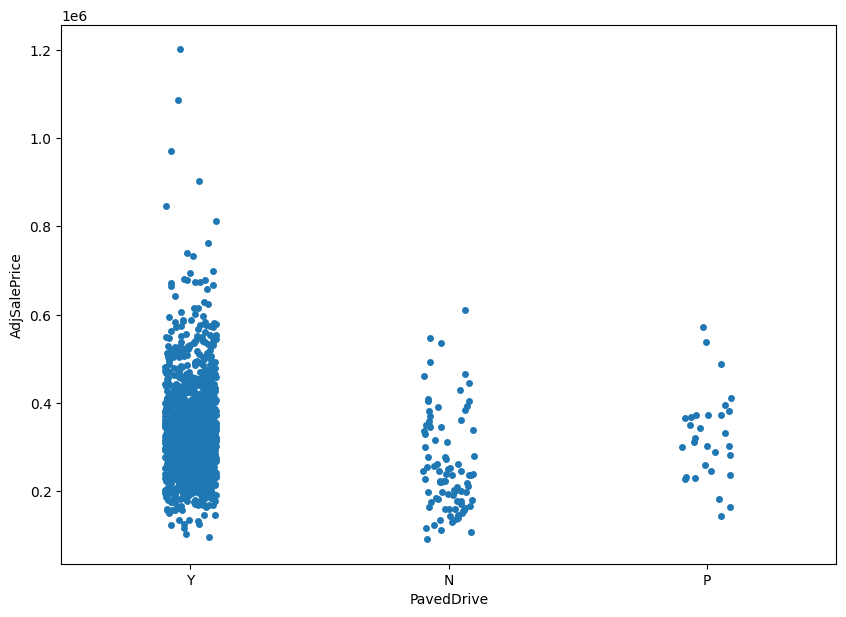

In [11]:
plt.rc('figure', figsize=(10, 7))
sns.stripplot(data = df_target, x = "PavedDrive", y = "AdjSalePrice", dodge=True)

In [12]:
df_target.groupby('GarageType')['AdjSalePrice'].mean()

GarageType
2Types     334912.187128
Attchd     353479.065235
Basment    316899.644265
BuiltIn    394816.198199
CarPort    248310.465204
Detchd     293713.625691
Name: AdjSalePrice, dtype: float64

In [13]:
df[['WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'AdjSalePrice']].corr()

,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,AdjSalePrice
WoodDeckSF,1.000000,0.058661,-0.125989,-0.032771,-0.074181,0.073378,0.246774
OpenPorchSF,0.058661,1.000000,-0.093079,-0.005842,0.074304,0.060762,0.221546
EnclosedPorch,-0.125989,-0.093079,1.000000,-0.037305,-0.082864,0.054203,-0.036033
3SsnPorch,-0.032771,-0.005842,-0.037305,1.000000,-0.031436,-0.007992,0.017264
ScreenPorch,-0.074181,0.074304,-0.082864,-0.031436,1.000000,0.051307,0.167482
PoolArea,0.073378,0.060762,0.054203,-0.007992,0.051307,1.000000,0.094409
AdjSalePrice,0.246774,0.221546,-0.036033,0.017264,0.167482,0.094409,1.000000


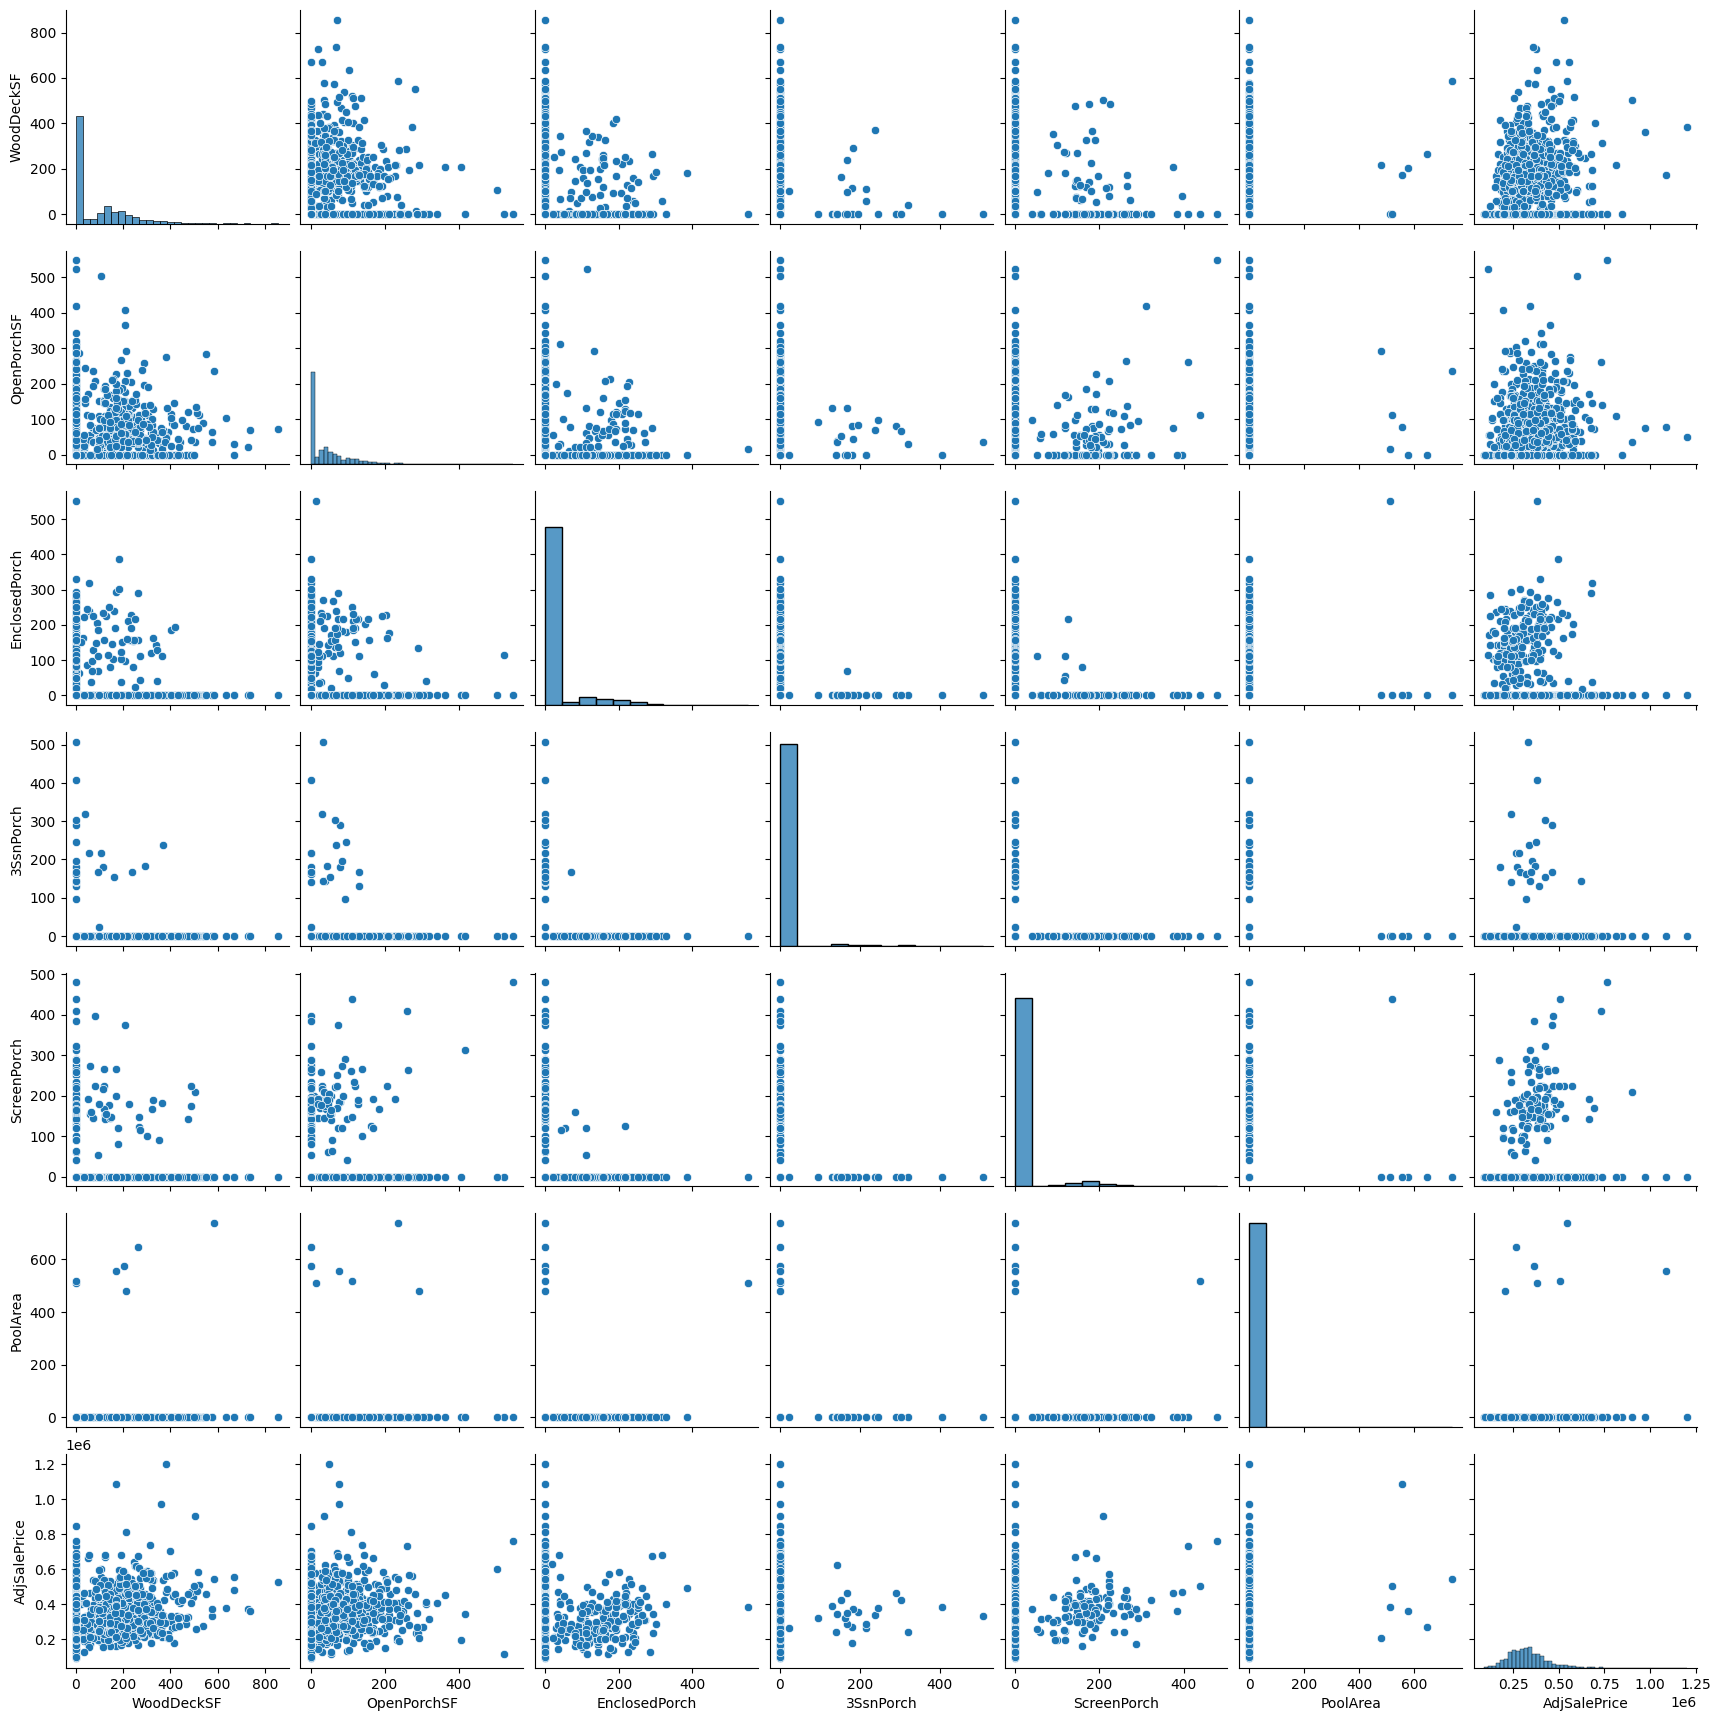

In [14]:
sns.pairplot(df[['WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'AdjSalePrice']])

<Axes: xlabel='PoolQC', ylabel='AdjSalePrice'>

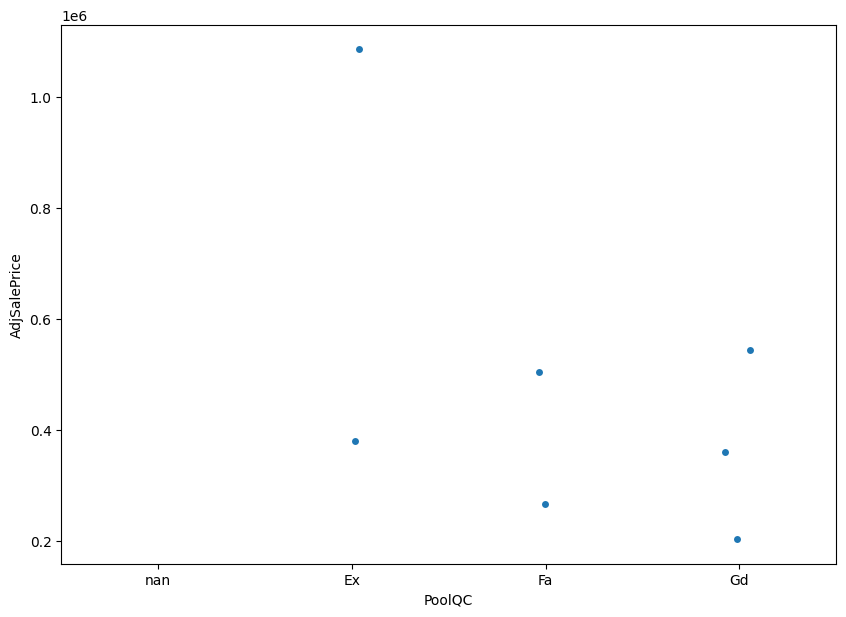

In [15]:
plt.rc('figure', figsize=(10, 7))
sns.stripplot(data = df_target, x = "PoolQC", y = "AdjSalePrice", dodge=True)

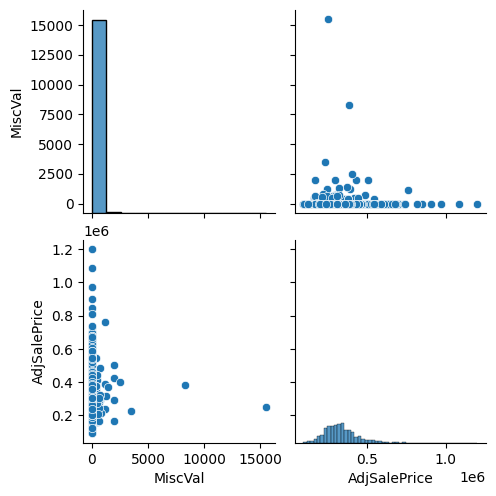

In [16]:
sns.pairplot(df[['MiscVal', 'AdjSalePrice']])

<Axes: xlabel='SaleType', ylabel='AdjSalePrice'>

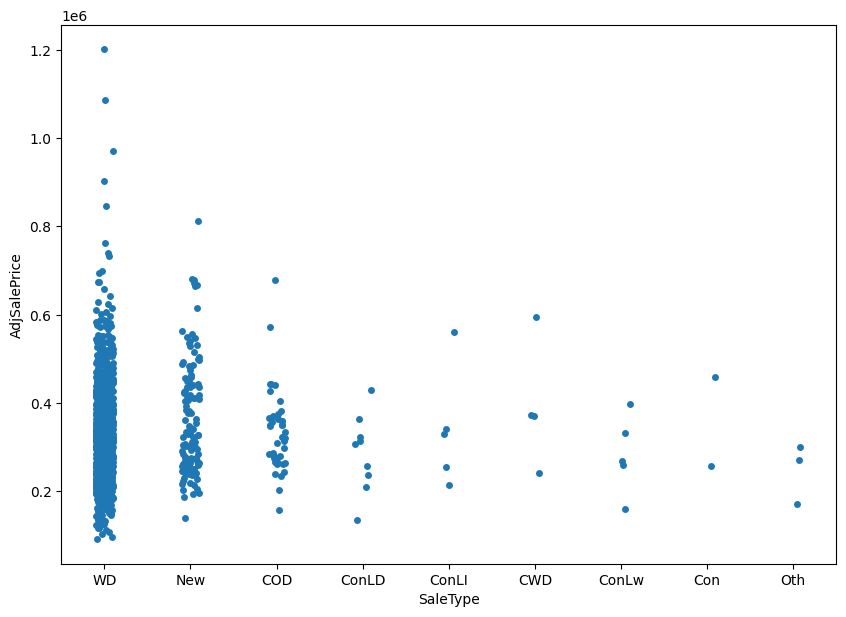

In [17]:
plt.rc('figure', figsize=(10, 7))
sns.stripplot(data = df_target, x = "SaleType", y = "AdjSalePrice", dodge=True)

<Axes: xlabel='SaleCondition', ylabel='AdjSalePrice'>

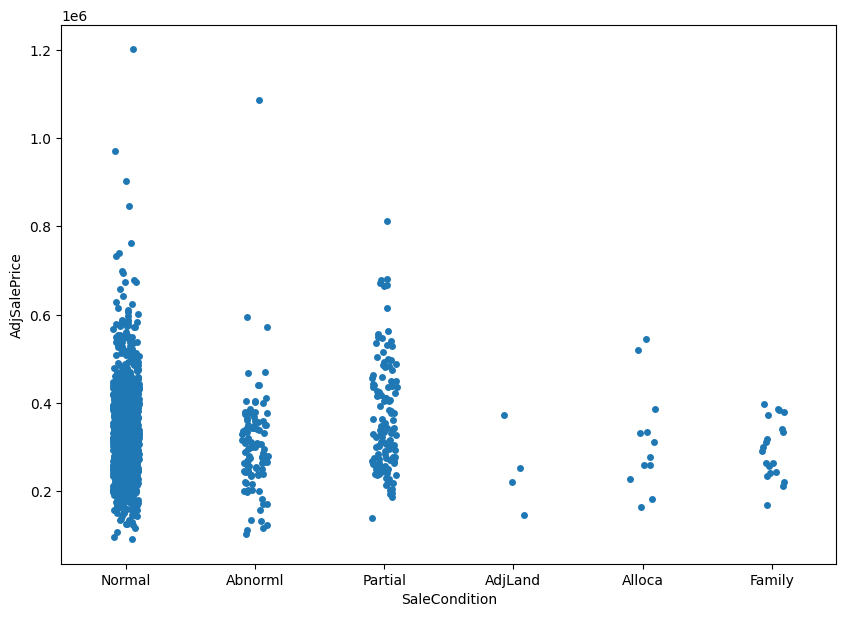

In [18]:
plt.rc('figure', figsize=(10, 7))
sns.stripplot(data = df_target, x = "SaleCondition", y = "AdjSalePrice", dodge=True)

In [19]:
df_target.groupby('SaleCondition')['AdjSalePrice'].count()

SaleCondition
Abnorml     101
AdjLand       4
Alloca       12
Family       20
Normal     1198
Partial     125
Name: AdjSalePrice, dtype: int64

In [20]:
df_target.groupby('GarageQual')['GarageQual'].count()

GarageQual
Ex       3
Fa      48
Gd      14
Po       3
TA    1311
Name: GarageQual, dtype: int64

|Column|Description|
|-|-|
|GarageType|Moderate skew, correlation|
|GarageYrBlt|Correlation, but this could also be because most garage are built with house, so this is essentailly 'YearBuilt'|
|GarageFinish|Good distribution, correlation|
|GarageCars|Correlation, but high number has little data|
|GarageArea|Correlation|
|GarageQual|Heavily skewed, most data concentrated at 'TA', but the correlation is linear|
|GarageCond|Heavily skewed, most data concentrated at 'TA', the correlation is not linear because 'Ex' only has 2 data points|
|PavedDrive|Heavily skewed, most data concentrated at 'Y', the correlation is linear|
|WoodDeckSF|Heavily skewed, most house has 0 value, data with value does have positive correlation|
|OpenPorchSF|Heavily skewed, most house has 0 value, data with value does have positive correlation|
|EnclosedPorch|Heavily skewed, most house has no enclosed porch, data with enclosed porch does have positive correlation|
|3SsnPorch|Heavily skewed, most house has no 3-season porch, not enough house with 3-season porch to be useful|
|ScreenPorch|Heavily skewed, most house has no screen porch, data with screen porch does have positive correlation|
|PoolArea|Heavily skewed, most house has no pool, not enough house with pool to be useful|
|PoolQC|Too little data, discard|
|Fence|Too little data, discard|
|MiscFeature|Too little data, discard|
|MiscVal|Heavily skewed, most house has 0 value, discard|
|SaleType|Heavily skewed, most data is 'WD', discard|
|SaleCondition|Heavily skewed, most data is 'Normal', discard|